In [1]:
import pandas as pd
import numpy as np
import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import math
import matplotlib.pyplot as plt
import time

In [2]:
df = pd.read_csv('full_df.csv')

In [3]:
df

,Date,Close,Open,High,Low,Vol,Change %,average_clustering,density,number_of_edges,number_of_nodes,degree_assortativity_coefficient
0,7-Nov-10,0.3,0.4,0.5,0.1,341460.0,-0.29,0.007455,0.000029,83901,53777,-0.034259
1,14-Nov-10,0.3,0.3,0.3,0.2,146410.0,0.00,0.005057,0.000031,81415,50991,-0.014705
2,21-Nov-10,0.3,0.3,0.3,0.3,73380.0,0.00,0.004321,0.000031,76046,49316,0.014105
3,28-Nov-10,0.2,0.3,0.3,0.2,136930.0,-0.28,0.006888,0.000028,90315,56969,-0.054024
4,5-Dec-10,0.2,0.2,0.2,0.2,66890.0,0.00,0.006479,0.000027,90881,57686,-0.028229
...,...,...,...,...,...,...,...,...,...,...,...,...
107,25-Nov-12,12.6,12.4,12.7,11.9,189370.0,0.01,0.007650,0.000003,1209759,676350,-0.031663
108,2-Dec-12,13.4,12.6,13.7,12.4,226350.0,0.07,0.008245,0.000003,1051403,583087,-0.024736
109,9-Dec-12,13.5,13.4,13.9,13.0,228090.0,0.01,0.008665,0.000004,877302,486018,-0.028629
110,16-Dec-12,13.4,13.5,13.7,12.8,241510.0,-0.01,0.009038,0.000004,932686,508916,-0.029427


In [4]:
dates = df["Date"]
df.drop("Date",axis= 1, inplace = True)

In [5]:
Y = df["Close"]
X = df.drop(["Close"],axis=1)

In [6]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [8]:
trainX = np.array(X_train)
testX = np.array(X_test)

In [9]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [10]:
look_back = 10

In [11]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, y_train, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
75/75 - 0s - loss: 65.7935
Epoch 2/100
75/75 - 0s - loss: 61.8517
Epoch 3/100
75/75 - 0s - loss: 57.2102
Epoch 4/100
75/75 - 0s - loss: 52.4342
Epoch 5/100
75/75 - 0s - loss: 47.9895
Epoch 6/100
75/75 - 0s - loss: 43.9795
Epoch 7/100
75/75 - 0s - loss: 40.1939
Epoch 8/100
75/75 - 0s - loss: 36.7047
Epoch 9/100
75/75 - 0s - loss: 33.6982
Epoch 10/100
75/75 - 0s - loss: 31.1830
Epoch 11/100
75/75 - 0s - loss: 29.1064
Epoch 12/100
75/75 - 0s - loss: 27.3504
Epoch 13/100
75/75 - 0s - loss: 25.8375
Epoch 14/100
75/75 - 0s - loss: 24.4827
Epoch 15/100
75/75 - 0s - loss: 23.2985
Epoch 16/100
75/75 - 0s - loss: 22.1701
Epoch 17/100
75/75 - 0s - loss: 21.1537
Epoch 18/100
75/75 - 0s - loss: 20.1782
Epoch 19/100
75/75 - 0s - loss: 19.2883
Epoch 20/100
75/75 - 0s - loss: 18.4637
Epoch 21/100
75/75 - 0s - loss: 17.6951
Epoch 22/100
75/75 - 0s - loss: 17.0032
Epoch 23/100
75/75 - 0s - loss: 16.3799
Epoch 24/100
75/75 - 0s - loss: 15.8042
Epoch 25/100
75/75 - 0s - loss: 15.2869
Epoch 26/

In [12]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train, trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test, testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 1.32 RMSE
Test Score: 1.15 RMSE


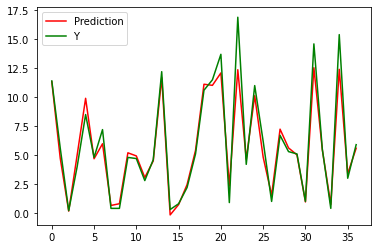

In [13]:
plt.plot(np.arange(37),testPredict, c="r",label="Prediction")
plt.plot(np.arange(37),y_test, c="g", label="Y")
plt.legend()
plt.show()

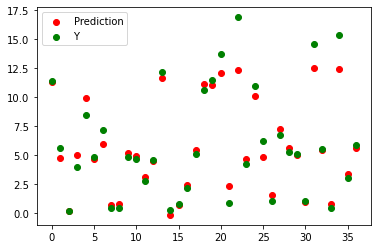

In [14]:
plt.scatter(np.arange(37),testPredict, c="r",label="Prediction")
plt.scatter(np.arange(37),y_test, c="g",label="Y")
plt.legend()
plt.show()

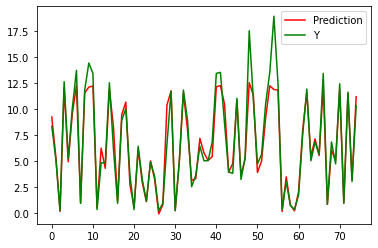

In [15]:
plt.plot(np.arange(trainPredict.shape[0]),trainPredict, c="r", label="Prediction")
plt.plot(np.arange(trainPredict.shape[0]),y_train, c="g", label="Y")
plt.legend()
plt.show()

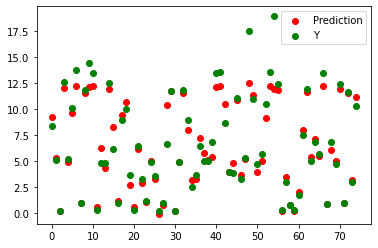

In [16]:
plt.scatter(np.arange(trainPredict.shape[0]),trainPredict, c="r", label="Prediction")
plt.scatter(np.arange(trainPredict.shape[0]),y_train, c="g", label="Y")
plt.legend()
plt.show()

In [17]:
df = pd.read_csv('price_informations.csv')

In [18]:
df

,Date,Close,Open,High,Low,Vol,Change %
0,7-Nov-10,0.3,0.4,0.5,0.1,341460.0,-0.29
1,14-Nov-10,0.3,0.3,0.3,0.2,146410.0,0.00
2,21-Nov-10,0.3,0.3,0.3,0.3,73380.0,0.00
3,28-Nov-10,0.2,0.3,0.3,0.2,136930.0,-0.28
4,5-Dec-10,0.2,0.2,0.2,0.2,66890.0,0.00
...,...,...,...,...,...,...,...
160,1-Dec-13,697.0,1205.7,1239.9,576.0,362230.0,-0.42
161,8-Dec-13,908.9,697.0,1067.7,653.0,144170.0,0.30
162,15-Dec-13,640.5,908.9,927.9,454.9,293970.0,-0.30
163,22-Dec-13,762.0,640.5,836.8,615.0,93740.0,0.19


In [19]:
dates = df["Date"]
df.drop("Date",axis= 1, inplace = True)
Y = df["Close"]
X = df.drop(["Close"],axis=1)
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
trainX = np.array(X_train)
testX = np.array(X_test)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
look_back = 5

model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, y_train, epochs=100, batch_size=1, verbose=2)



Epoch 1/100
110/110 - 0s - loss: 39517.8867
Epoch 2/100
110/110 - 0s - loss: 39498.7773
Epoch 3/100
110/110 - 0s - loss: 39475.1758
Epoch 4/100
110/110 - 0s - loss: 39449.1211
Epoch 5/100
110/110 - 0s - loss: 39419.1445
Epoch 6/100
110/110 - 0s - loss: 39386.4492
Epoch 7/100
110/110 - 0s - loss: 39352.1484
Epoch 8/100
110/110 - 0s - loss: 39314.3438
Epoch 9/100
110/110 - 0s - loss: 39274.9648
Epoch 10/100
110/110 - 0s - loss: 39236.8047
Epoch 11/100
110/110 - 0s - loss: 39196.9609
Epoch 12/100
110/110 - 0s - loss: 39156.2305
Epoch 13/100
110/110 - 0s - loss: 39117.9141
Epoch 14/100
110/110 - 0s - loss: 39081.5859
Epoch 15/100
110/110 - 0s - loss: 39045.5547
Epoch 16/100
110/110 - 0s - loss: 39009.9727
Epoch 17/100
110/110 - 0s - loss: 38976.4180
Epoch 18/100
110/110 - 0s - loss: 38942.6055
Epoch 19/100
110/110 - 0s - loss: 38910.7188
Epoch 20/100
110/110 - 0s - loss: 38879.4492
Epoch 21/100
110/110 - 0s - loss: 38849.6680
Epoch 22/100
110/110 - 0s - loss: 38819.4648
Epoch 23/100
110/11

In [20]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train, trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test, testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 193.17 RMSE
Test Score: 177.17 RMSE


In [21]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train, trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test, testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 193.17 RMSE
Test Score: 177.17 RMSE


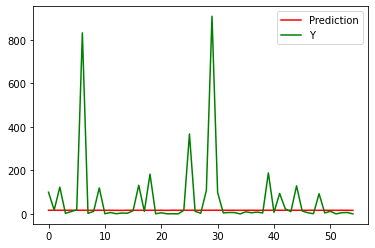

In [22]:
plt.plot(np.arange(testPredict.shape[0]),testPredict, c="r",label="Prediction")
plt.plot(np.arange(testPredict.shape[0]),y_test, c="g", label="Y")
plt.legend()
plt.show()

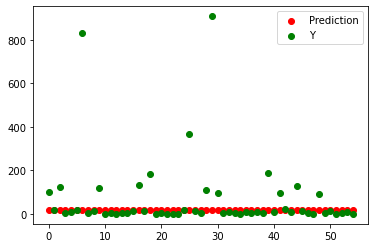

In [23]:
plt.scatter(np.arange(testPredict.shape[0]),testPredict, c="r",label="Prediction")
plt.scatter(np.arange(testPredict.shape[0]),y_test, c="g",label="Y")
plt.legend()
plt.show()

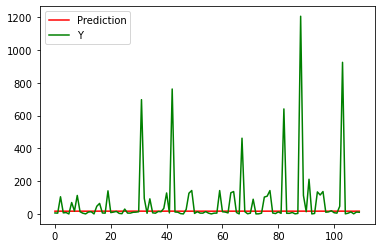

In [24]:
plt.plot(np.arange(trainPredict.shape[0]),trainPredict, c="r", label="Prediction")
plt.plot(np.arange(trainPredict.shape[0]),y_train, c="g", label="Y")
plt.legend()
plt.show()

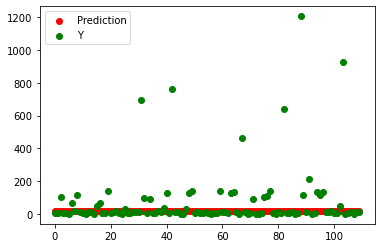

In [25]:
plt.scatter(np.arange(trainPredict.shape[0]),trainPredict, c="r", label="Prediction")
plt.scatter(np.arange(trainPredict.shape[0]),y_train, c="g", label="Y")
plt.legend()
plt.show()